In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# 1. Générez cette base de données telle que 

In [2]:
lambd1=np.random.normal((1,1),0.4,size=(300,2))
lambd2=np.random.normal((-1,-1),0.4,size=(300,2))

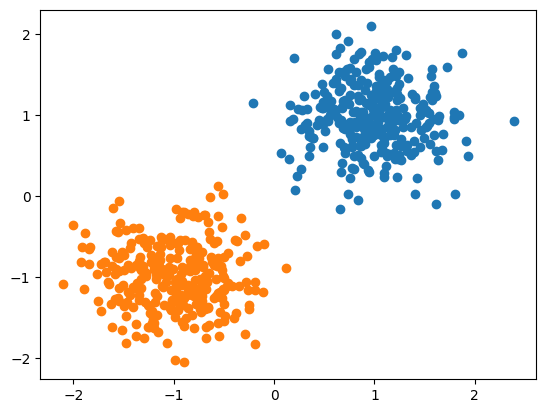

In [3]:
plt.scatter(lambd1[:,0],lambd1[:,1])
plt.scatter(lambd2[:,0],lambd2[:,1])

## Oui les données sont lineairement séparables

In [4]:
y=np.array([1 if i <300 else -1 for i in range(600)])
X=np.concatenate((lambd1,lambd2),axis=0)

# 4. Proposez une paramétrisation de SVC pour vous assurer :

In [5]:
clf=SVC(C=1000,kernel='linear',max_iter=-1)

## Pour la parametisation `kernel=linear` rendre le model lineaire et `max_iter=-1` signifie que on va apprendre jusqu'à ce que toutes les soient bien classé

# 5. Entrainez un SVM avec cette paramétrisation sur l’ensemble des données

In [6]:
clf.fit(X,y)
pass

# 6. Du modèle appris, récupérez et affichez 

In [7]:
clf.n_support_

array([2, 1], dtype=int32)

In [8]:
indice_SV = clf.support_
alphas = clf.dual_coef_ [0]
b = clf.intercept_
print(f"Indices of support vectors: {indice_SV}, dual coefficients: {alphas},intercept: {b}")

Indices of support vectors: [345 496  10], dual coefficients: [-3.29008892 -2.0287432   5.31883212],intercept: [0.28640025]


## Combien de valeurs contient alphas ? Pourquoi ?

In [9]:
len(alphas)

3

## Le nombre de alpha corrspond au nombre de point de support trouvé

# 7. À partir de ces valeurs, calculez le vecteur w

In [10]:
W=np.array([sum(alphas[i]*y[indice_SV[i]]*X[indice_SV[i]]) for i in range(len(alphas))])
W

array([-1.42195811, -1.56693444,  1.53187997])

# 8. Verifiez que les points supports sont telles que h(x) = w.Tx + b = ±1

In [11]:
W@X[indice_SV].T+b

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [ ]:
X[indice_SV]